In [1]:
import numpy as np
import pandas as pd
import statistics
import scipy.stats

pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

In [3]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')

Vamos a continuar trabajando con el dataset de la NBA que trae estadísticas de los jugadores para la temporada 2019-2020.

El dataset contiene las siguientes variables:

* **player**: nombre del jugador
* **position**: posicion que juega el jugador
* **age**: edad
* **team_id**: equipo
* **g**: cantidad de partidos jugados
* **mp_per_g**: minutos por partido
* **rb_per_g**: rebotes por partido
* **ast_per_g**: asistencias por partido
* **stl_per_g**:robos por partido
* **blk_per_g**:tapas/bloqueos por partido
* **pts_per_g**:puntos por partido

Estas variables **son promedios** en si mismas. Usando los estadísticos descriptivos vistos en clase vamos a tratar de entender un poco mejor las diferencias entre la posiciones y los equipos.

In [4]:
# Cargamos el dataset desde el link
nba = pd.read_csv('estadisticas_nba.csv')

In [5]:
nba.head(10)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,Steven Adams,C,26,OKC,63,26.70,9.30,2.30,0.80,1.10,10.90
1,Bam Adebayo,PF,22,MIA,72,33.60,10.20,5.10,1.10,1.30,15.90
2,LaMarcus Aldridge,C,34,SAS,53,33.10,7.40,2.40,0.70,1.60,18.90
3,Kyle Alexander,C,23,MIA,2,6.50,1.50,0.00,0.00,0.00,1.00
4,Nickeil Alexander-Walker,SG,21,NOP,47,12.60,1.80,1.90,0.40,0.20,5.70
5,Grayson Allen,SG,24,MEM,38,18.90,2.20,1.40,0.30,0.10,8.70
6,Jarrett Allen,C,21,BRK,70,26.50,9.60,1.60,0.60,1.30,11.10
7,Kadeem Allen,PG,27,NYK,10,11.70,0.90,2.10,0.50,0.20,5.00
8,Al-Farouq Aminu,PF,29,ORL,18,21.10,4.80,1.20,1.00,0.40,4.30
9,Justin Anderson,SG,26,BRK,10,10.70,2.10,0.80,0.00,0.60,2.80


In [7]:
nba.head(20)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,Steven Adams,C,26,OKC,63,26.70,9.30,2.30,0.80,1.10,10.90
1,Bam Adebayo,PF,22,MIA,72,33.60,10.20,5.10,1.10,1.30,15.90
2,LaMarcus Aldridge,C,34,SAS,53,33.10,7.40,2.40,0.70,1.60,18.90
3,Kyle Alexander,C,23,MIA,2,6.50,1.50,0.00,0.00,0.00,1.00
4,Nickeil Alexander-Walker,SG,21,NOP,47,12.60,1.80,1.90,0.40,0.20,5.70
5,Grayson Allen,SG,24,MEM,38,18.90,2.20,1.40,0.30,0.10,8.70
6,Jarrett Allen,C,21,BRK,70,26.50,9.60,1.60,0.60,1.30,11.10
7,Kadeem Allen,PG,27,NYK,10,11.70,0.90,2.10,0.50,0.20,5.00
8,Al-Farouq Aminu,PF,29,ORL,18,21.10,4.80,1.20,1.00,0.40,4.30
9,Justin Anderson,SG,26,BRK,10,10.70,2.10,0.80,0.00,0.60,2.80


# 1) Medidas de tendencia central

## 1.1)
Para analizar las estadísticas por equipo tenemos que quitar a los jugadores del equipo "TOT" ya que estos son jugadores que fueron vendidos a mitad de temporada.

Calcular el promedio y la mediana a nivel equipo para las variables trb_per_g, ast_per_g, stl_per_g, blk_per_g, pts_per_g

In [8]:
# Sacamos 'TOT', agrupamos por equipo y obtenemos estadisticos
teams_tc = nba.loc[nba.team_id != 'TOT'].groupby('team_id').agg({
                                                                'player': 'count',
                                                                'pts_per_g':['mean', 'median','sum'],
                                                                'stl_per_g':['mean', 'median'],
                                                                'blk_per_g':['mean', 'median'],
                                                                'ast_per_g': ['mean', 'median']
                                                                })

teams_tc.head()

player pts_per_g               stl_per_g        blk_per_g         \
         count      mean median    sum      mean median      mean median   
team_id                                                                    
ATL         14      8.86   5.70 124.00      0.68   0.60      0.41   0.35   
BOS         17      8.75   5.20 148.70      0.67   0.60      0.50   0.40   
BRK         21      8.68   5.90 182.20      0.53   0.50      0.33   0.20   
CHI         17      8.74   7.30 148.50      0.83   0.80      0.36   0.30   
CHO         14      8.78   6.80 122.90      0.69   0.70      0.36   0.25   

        ast_per_g         
             mean median  
team_id                   
ATL          1.95   1.50  
BOS          1.76   1.00  
BRK          2.02   1.60  
CHI          1.73   1.20  
CHO          2.11   1.65

In [9]:
teams_tc.columns

MultiIndex([(   'player',  'count'),
            ('pts_per_g',   'mean'),
            ('pts_per_g', 'median'),
            ('pts_per_g',    'sum'),
            ('stl_per_g',   'mean'),
            ('stl_per_g', 'median'),
            ('blk_per_g',   'mean'),
            ('blk_per_g', 'median'),
            ('ast_per_g',   'mean'),
            ('ast_per_g', 'median')],
           )

In [10]:
teams_tc.reset_index()

team_id player pts_per_g               stl_per_g        blk_per_g         \
            count      mean median    sum      mean median      mean median   
0      ATL     14      8.86   5.70 124.00      0.68   0.60      0.41   0.35   
1      BOS     17      8.75   5.20 148.70      0.67   0.60      0.50   0.40   
2      BRK     21      8.68   5.90 182.20      0.53   0.50      0.33   0.20   
3      CHI     17      8.74   7.30 148.50      0.83   0.80      0.36   0.30   
4      CHO     14      8.78   6.80 122.90      0.69   0.70      0.36   0.25   
5      CLE     15      7.34   4.60 110.10      0.57   0.60      0.22   0.20   
6      DAL     16      9.50   7.95 152.00      0.51   0.50      0.39   0.20   
7      DEN     13     10.08   9.30 131.10      0.73   0.70      0.48   0.50   
8      DET     14      8.48   8.45 118.70      0.51   0.50      0.28   0.20   
9      GSW     14      8.75   8.15 122.50      0.71   0.70      0.33   0.25   
10     HOU     16      9.09   5.90 145.50      0.70   0.60      0.38   0.30   
11     IND     17      8.82   8.30 150.00      0.61   0.60      0.42   0.20   
12     LAC     15      9.33   6.80 140.00      0.57   0.40      0.34   0.20   
13     LAL     16      8.71   6.85 139.30      0.69   0.65      0.44   0.20   
14     MEM     14      9.40   8.15 131.60      0.61   0.65      0.44   0.30   
15     MIA     17      8.51   8.20 144.60      0.59   0.60      0.36   0.30   
16     MIL     15      9.72   6.90 145.80      0.62   0.60      0.43   0.20   
17     MIN      8     10.03   8.80  80.20      0.71   0.80      0.47   0.40   
18     NOP     17      9.97   8.10 169.50      0.62   0.60      0.45   0.40   
19     NYK     15      8.08   6.50 121.20      0.65   0.50      0.37   0.30   
20     OKC     18      7.65   5.95 137.70      0.55   0.45      0.37   0.25   
21     ORL     17      8.12   5.80 138.10      0.73   0.60      0.46   0.30   
22     PHI     14      9.24   7.70 129.40      0.66   0.55      0.56   0.60   
23     PHO     17      9.30   9.10 158.10      0.62   0.60      0.34   0.30   
24     POR     14     11.01   8.60 154.20      0.62   0.60      0.64   0.30   
25     SAC     15      9.35   6.90 140.20      0.61   0.60      0.34   0.20   
26     SAS     17      8.59   6.40 146.10      0.53   0.50      0.45   0.30   
27     TOR     17      8.84   7.00 150.20      0.71   0.50      0.40   0.30   
28     UTA     17      7.46   4.90 126.90      0.45   0.40      0.32   0.20   
29     WAS     18      8.92   6.90 160.60      0.61   0.65      0.38   0.35   

   ast_per_g         
        mean median  
0       1.95   1.50  
1       1.76   1.00  
2       2.02   1.60  
3       1.73   1.20  
4       2.11   1.65  
5       1.56   2.10  
6       2.03   1.55  
7       2.41   2.10  
8       2.14   1.70  
9       2.51   2.05  
10      1.67   0.90  
11      2.10   1.50  
12      1.94   1.30  
13      1.97   1.20  
14      2.09   1.50  
15      2.08   1.40  
16      2.24   1.50  
17      1.98   1.45  
18      2.26   1.60  
19      2.01   1.40  
20      1.50   0.85  
21      1.82   1.20  
22      2.24   1.80  
23      2.11   1.60  
24      1.97   1.35  
25      1.86   1.30  
26      1.84   1.70  
27      2.04   1.60  
28      1.68   1.20  
29      1.88   1.40

Veamos como acomodar los nombres de las columnas.

In [11]:
# OPCION 1)

# teams_tc.columns = teams_tc.columns.droplevel(0)
# teams_tc = teams_tc.reset_index()
# teams_tc.columns = ['team_id',
#                     'player_count',
#                     'pts_per_g_mean',
#                     'pts_per_g_median',
#                     'pts_per_g_sum',
#                     'stl_per_g_mean',
#                     'stl_per_g_median',
#                     'blk_per_g_mean',
#                     'blk_per_g_median',
#                     'ast_per_g_mean',
#                     'ast_per_g_median']


# OPCION 2)
teams_tc.columns = teams_tc.columns.map('_'.join)
teams_tc = teams_tc.reset_index()

teams_tc.head(10)

,team_id,player_count,pts_per_g_mean,pts_per_g_median,pts_per_g_sum,stl_per_g_mean,stl_per_g_median,blk_per_g_mean,blk_per_g_median,ast_per_g_mean,ast_per_g_median
0,ATL,14,8.86,5.70,124.00,0.68,0.60,0.41,0.35,1.95,1.50
1,BOS,17,8.75,5.20,148.70,0.67,0.60,0.50,0.40,1.76,1.00
2,BRK,21,8.68,5.90,182.20,0.53,0.50,0.33,0.20,2.02,1.60
3,CHI,17,8.74,7.30,148.50,0.83,0.80,0.36,0.30,1.73,1.20
4,CHO,14,8.78,6.80,122.90,0.69,0.70,0.36,0.25,2.11,1.65
5,CLE,15,7.34,4.60,110.10,0.57,0.60,0.22,0.20,1.56,2.10
6,DAL,16,9.50,7.95,152.00,0.51,0.50,0.39,0.20,2.03,1.55
7,DEN,13,10.08,9.30,131.10,0.73,0.70,0.48,0.50,2.41,2.10
8,DET,14,8.48,8.45,118.70,0.51,0.50,0.28,0.20,2.14,1.70
9,GSW,14,8.75,8.15,122.50,0.71,0.70,0.33,0.25,2.51,2.05


In [12]:
teams_tc.columns

Index(['team_id', 'player_count', 'pts_per_g_mean', 'pts_per_g_median',
       'pts_per_g_sum', 'stl_per_g_mean', 'stl_per_g_median', 'blk_per_g_mean',
       'blk_per_g_median', 'ast_per_g_mean', 'ast_per_g_median'],
      dtype='object')

## 1.2 )
**Analizar graficamente** los resultados usando **HISTOGRAMAS**

In [13]:
teams_tc.columns[2:]

Index(['pts_per_g_mean', 'pts_per_g_median', 'pts_per_g_sum', 'stl_per_g_mean',
       'stl_per_g_median', 'blk_per_g_mean', 'blk_per_g_median',
       'ast_per_g_mean', 'ast_per_g_median'],
      dtype='object')

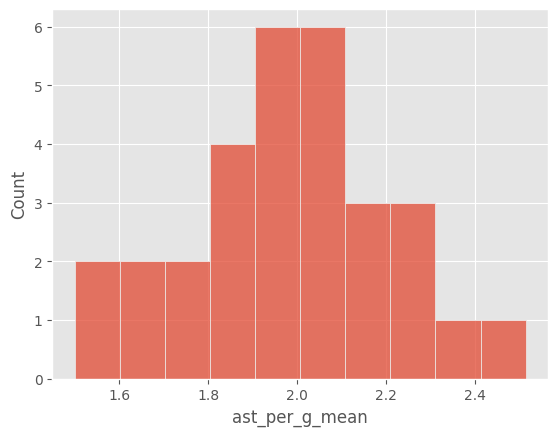

In [14]:
sns.histplot(data=teams_tc, x='ast_per_g_mean', bins=10)
plt.show()

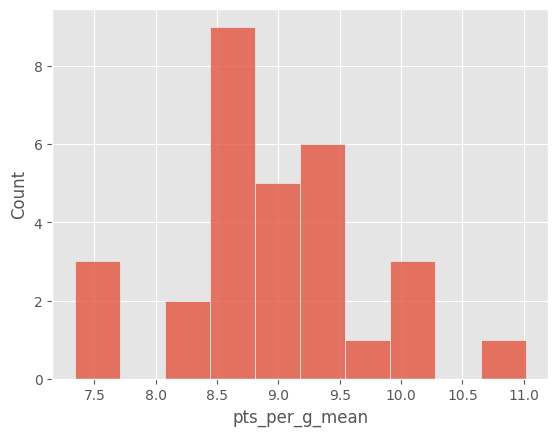

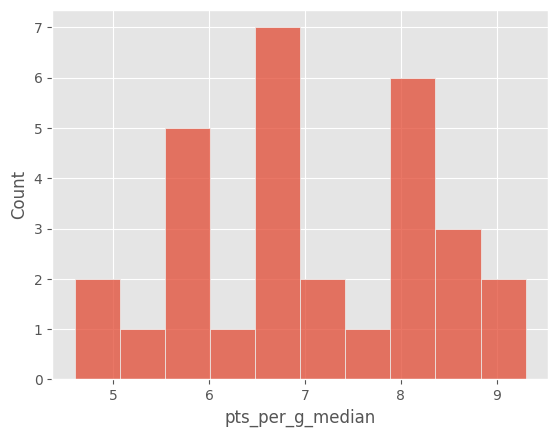

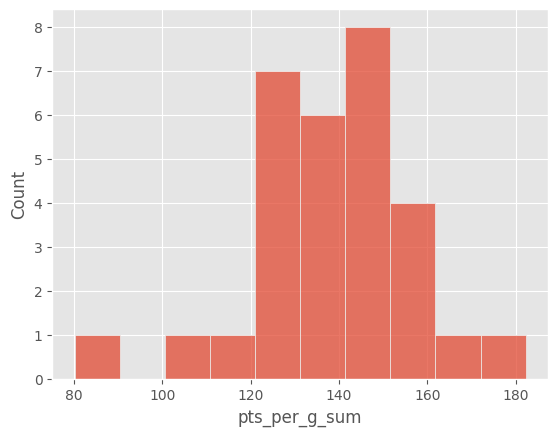

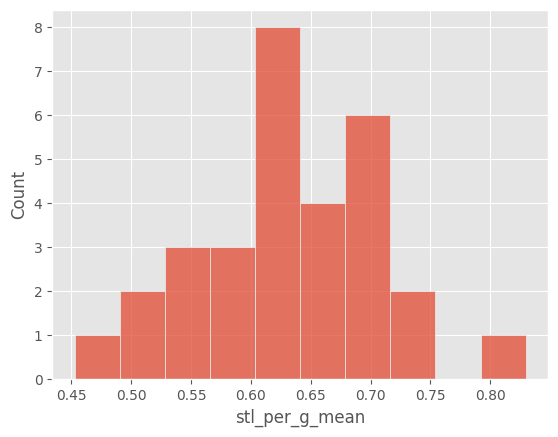

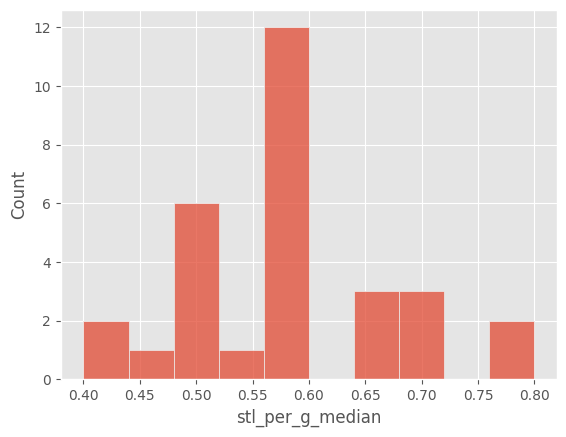

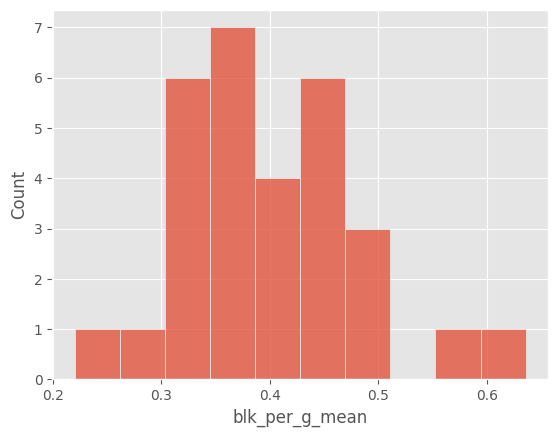

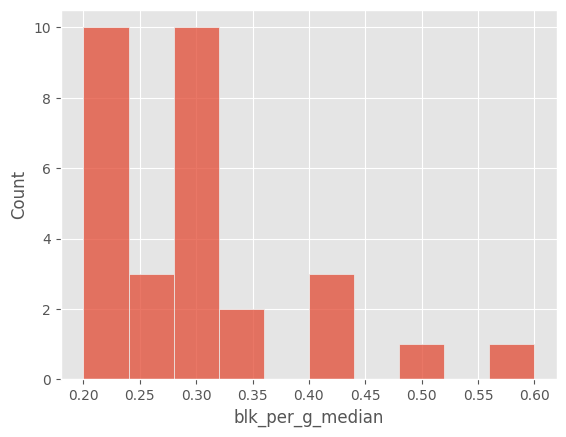

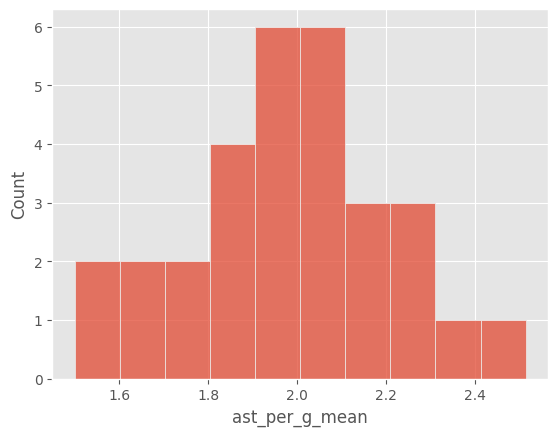

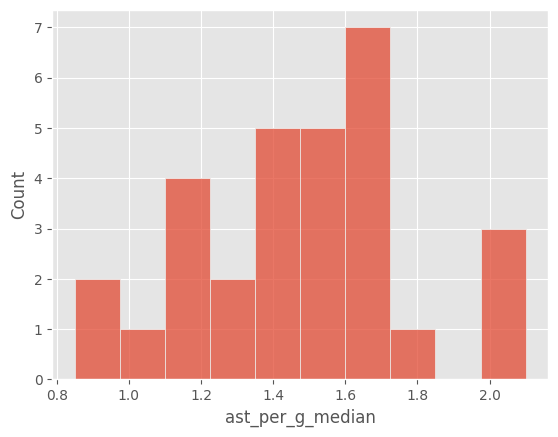

In [ ]:
for col in teams_tc.columns[2:]:
  sns.histplot(data=teams_tc, x=col, bins=10)
  plt.show()

## 1.3)
Usar los histogramas para visualizar la diferencia entre la mediana y la media. Esto nos va a ayudar a empezar a ver si tenemos outliers dentro de los equipos.

TIP: usar el comando melt para generar la base necesaria para graficar

In [ ]:
pd.melt?

In [ ]:
teams_tc.head()

,team_id,player_count,pts_per_g_mean,pts_per_g_median,pts_per_g_sum,stl_per_g_mean,stl_per_g_median,blk_per_g_mean,blk_per_g_median,ast_per_g_mean,ast_per_g_median
0,ATL,14,8.86,5.70,124.00,0.68,0.60,0.41,0.35,1.95,1.50
1,BOS,17,8.75,5.20,148.70,0.67,0.60,0.50,0.40,1.76,1.00
2,BRK,21,8.68,5.90,182.20,0.53,0.50,0.33,0.20,2.02,1.60
3,CHI,17,8.74,7.30,148.50,0.83,0.80,0.36,0.30,1.73,1.20
4,CHO,14,8.78,6.80,122.90,0.69,0.70,0.36,0.25,2.11,1.65


In [15]:
teams_tc_m = pd.melt(
        teams_tc[['team_id', 'pts_per_g_mean', 'pts_per_g_median']],
        id_vars = 'team_id',
        var_name = 'metrica',
        value_name = 'valor'
        )

teams_tc_m['metrica']

0       pts_per_g_mean
1       pts_per_g_mean
2       pts_per_g_mean
3       pts_per_g_mean
4       pts_per_g_mean
5       pts_per_g_mean
6       pts_per_g_mean
7       pts_per_g_mean
8       pts_per_g_mean
9       pts_per_g_mean
10      pts_per_g_mean
11      pts_per_g_mean
12      pts_per_g_mean
13      pts_per_g_mean
14      pts_per_g_mean
15      pts_per_g_mean
16      pts_per_g_mean
17      pts_per_g_mean
18      pts_per_g_mean
19      pts_per_g_mean
20      pts_per_g_mean
21      pts_per_g_mean
22      pts_per_g_mean
23      pts_per_g_mean
24      pts_per_g_mean
25      pts_per_g_mean
26      pts_per_g_mean
27      pts_per_g_mean
28      pts_per_g_mean
29      pts_per_g_mean
30    pts_per_g_median
31    pts_per_g_median
32    pts_per_g_median
33    pts_per_g_median
34    pts_per_g_median
35    pts_per_g_median
36    pts_per_g_median
37    pts_per_g_median
38    pts_per_g_median
39    pts_per_g_median
40    pts_per_g_median
41    pts_per_g_median
42    pts_per_g_median
43    pts_p

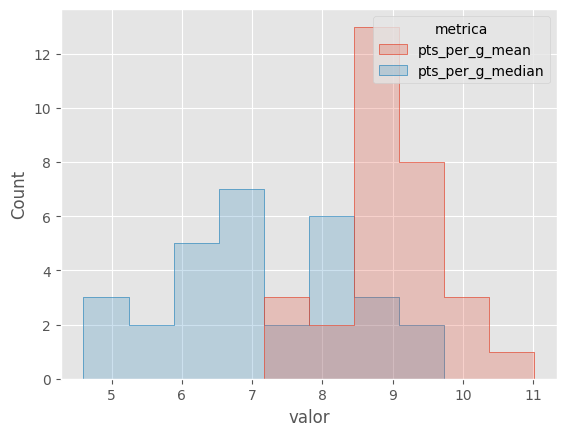

In [16]:
ax = sns.histplot(data=teams_tc_m,
             x="valor",
             bins=10,
             hue='metrica',
             element="step")

## 1.4)

Analicemos ahora los perfiles de los distintos **puestos de los jugadores**.

- C: Center (Pivot)
- PF: Power Forward (Ala Pivot)
- PG: Point Guard (Base)
- SF: Small Forward (Alero)
- SG: Shooting Guard (Escolta)

Empezar con el procedimiento análogo al realizado para calculas mediana y promedio a nivel equipo.

In [17]:
players_tc = nba.groupby('position').agg({
                                        'player': 'count',
                                        'pts_per_g':['mean', 'median'],
                                        'stl_per_g':['mean', 'median'],
                                        'blk_per_g':['mean', 'median'],
                                        'ast_per_g': ['mean', 'median']
                                        })

players_tc.columns = players_tc.columns.map('_'.join)
players_tc = players_tc.reset_index()

players_tc.head(10)

,position,player_count,pts_per_g_mean,pts_per_g_median,stl_per_g_mean,stl_per_g_median,blk_per_g_mean,blk_per_g_median,ast_per_g_mean,ast_per_g_median
0,C,107,7.90,6.60,0.48,0.40,0.79,0.70,1.21,1.00
1,C-PF,1,4.30,4.30,0.30,0.30,0.70,0.70,0.40,0.40
2,PF,105,8.32,6.00,0.55,0.50,0.42,0.30,1.44,1.10
3,PF-C,5,7.86,8.40,0.66,0.50,0.72,0.60,1.50,1.30
4,PF-SF,3,4.70,5.80,0.50,0.40,0.33,0.50,0.63,0.70
5,PG,91,10.56,7.90,0.81,0.80,0.20,0.20,3.83,3.40
6,PG-SG,1,7.00,7.00,0.40,0.40,0.20,0.20,1.90,1.90
7,SF,89,8.40,6.80,0.70,0.70,0.31,0.30,1.52,1.20
8,SF-C,1,3.60,3.60,0.30,0.30,0.20,0.20,1.00,1.00
9,SF-PF,3,10.30,10.50,0.67,0.80,0.47,0.50,1.43,1.40


In [18]:
players_tc['position'].value_counts(
)

C        1
C-PF     1
PF       1
PF-C     1
PF-SF    1
PG       1
PG-SG    1
SF       1
SF-C     1
SF-PF    1
SF-SG    1
SG       1
SG-PG    1
SG-SF    1
Name: position, dtype: int64

## 1.5)

En base a la cantidad de jugadores que hay en cada categoria, vemos que algunas posiciones son muy específicas y tienen pocos jugadores en ellas. Vamos a quitarlas para analizar solo los perfiles más "clásicos".

In [19]:
positions = players_tc[players_tc['player_count'] > 10]['position'].to_list()
positions

['C', 'PF', 'PG', 'SF', 'SG']

In [20]:
mascara_booleana = nba['position'].isin(positions)
nba[mascara_booleana]

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,Steven Adams,C,26,OKC,63,26.70,9.30,2.30,0.80,1.10,10.90
1,Bam Adebayo,PF,22,MIA,72,33.60,10.20,5.10,1.10,1.30,15.90
2,LaMarcus Aldridge,C,34,SAS,53,33.10,7.40,2.40,0.70,1.60,18.90
3,Kyle Alexander,C,23,MIA,2,6.50,1.50,0.00,0.00,0.00,1.00
4,Nickeil Alexander-Walker,SG,21,NOP,47,12.60,1.80,1.90,0.40,0.20,5.70
...,...,...,...,...,...,...,...,...,...,...,...
524,Trae Young,PG,21,ATL,60,35.30,4.30,9.30,1.10,0.10,29.60
525,Cody Zeller,C,27,CHO,58,23.10,7.10,1.50,0.70,0.40,11.10
526,Tyler Zeller,C,30,SAS,2,2.00,2.00,0.00,0.00,0.00,1.00
527,Ante Žižić,C,23,CLE,22,10.00,3.00,0.30,0.30,0.20,4.40


In [21]:
players_tc = nba[nba['position'].isin(positions)].groupby('position').agg({'player': 'count',
                                                                          'pts_per_g':['mean', 'median'],
                                                                          'stl_per_g':['mean', 'median'],
                                                                          'blk_per_g':['mean', 'median'],
                                                                          'ast_per_g': ['mean', 'median']})
players_tc.columns = players_tc.columns.map('_'.join)
players_tc = players_tc.reset_index()

players_tc

,position,player_count,pts_per_g_mean,pts_per_g_median,stl_per_g_mean,stl_per_g_median,blk_per_g_mean,blk_per_g_median,ast_per_g_mean,ast_per_g_median
0,C,107,7.90,6.60,0.48,0.40,0.79,0.70,1.21,1.00
1,PF,105,8.32,6.00,0.55,0.50,0.42,0.30,1.44,1.10
2,PG,91,10.56,7.90,0.81,0.80,0.20,0.20,3.83,3.40
3,SF,89,8.40,6.80,0.70,0.70,0.31,0.30,1.52,1.20
4,SG,118,8.85,7.45,0.63,0.50,0.25,0.20,1.90,1.55


## 1.6)

Analizar los perfiles de los diferentes puestos **graficamente** usando **GRAFICOS DE BARRAS**.

In [22]:
df_puestos = nba[nba.position.isin(positions)].groupby('position').agg({'mp_per_g': 'mean',
                                                        'trb_per_g': 'mean',
                                                        'ast_per_g': 'mean',
                                                        'stl_per_g': 'mean',
                                                        'blk_per_g': 'mean',
                                                        'pts_per_g': 'mean'
                                                        }).reset_index()
df_puestos.head()

,position,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,C,17.68,5.40,1.21,0.48,0.79,7.90
1,PF,19.22,4.25,1.44,0.55,0.42,8.32
2,PG,21.32,2.80,3.83,0.81,0.20,10.56
3,SF,20.28,3.17,1.52,0.70,0.31,8.40
4,SG,19.50,2.50,1.90,0.63,0.25,8.85


<Axes: xlabel='position', ylabel='pts_per_g'>

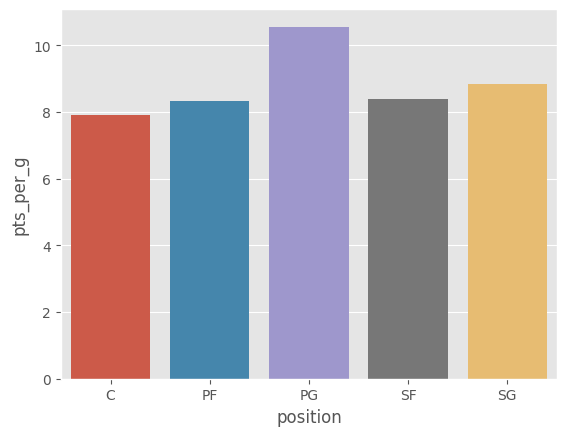

In [23]:
sns.barplot(x="position", y="pts_per_g", data=df_puestos)

<Axes: xlabel='position', ylabel='blk_per_g'>

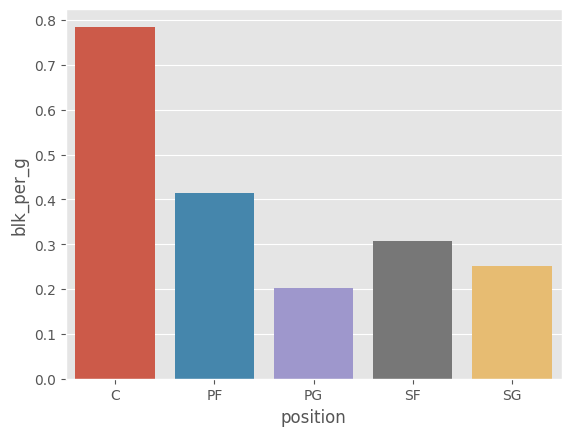

In [24]:
sns.barplot(x="position", y="blk_per_g", data=df_puestos)

In [25]:
players_tc_m = pd.melt(
    players_tc[['position',
                'pts_per_g_median',
                'stl_per_g_median',
                'ast_per_g_median',
                'blk_per_g_median']],
    id_vars = 'position',
    var_name = 'metrica',
    value_name = 'valor')

players_tc_m.head()

,position,metrica,valor
0,C,pts_per_g_median,6.60
1,PF,pts_per_g_median,6.00
2,PG,pts_per_g_median,7.90
3,SF,pts_per_g_median,6.80
4,SG,pts_per_g_median,7.45


<Axes: xlabel='valor', ylabel='metrica'>

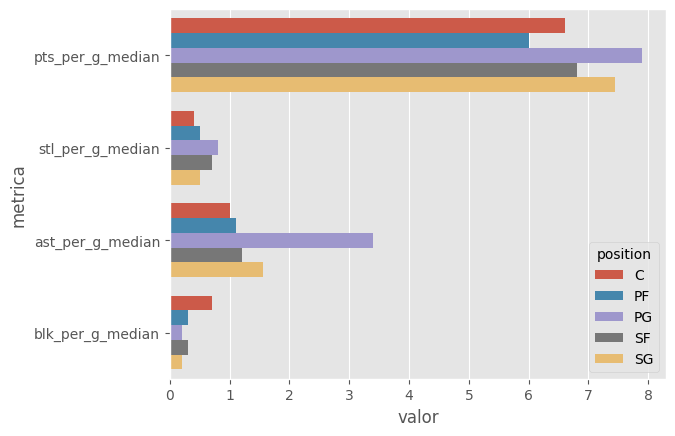

In [26]:
sns.barplot(x="valor", y="metrica", hue="position", data=players_tc_m)

## 1.7)

Analizar a los jugadores en forma individual usando **BOXPLOTS**. Buscar la distribución de la cantidad de puntos, asistencias y rebotes para cada perfil de jugador.

<Axes: ylabel='pts_per_g'>

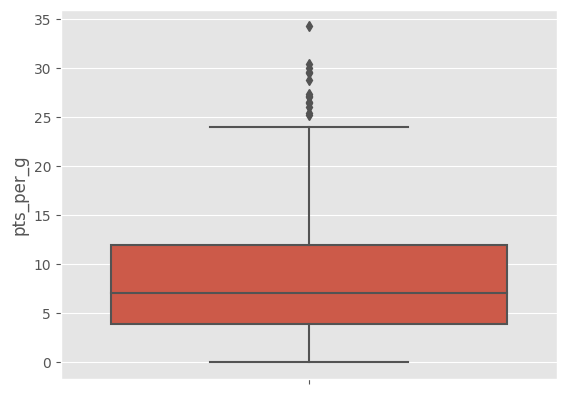

In [27]:
sns.boxplot(y='pts_per_g', data=nba[nba.position.isin(positions)])

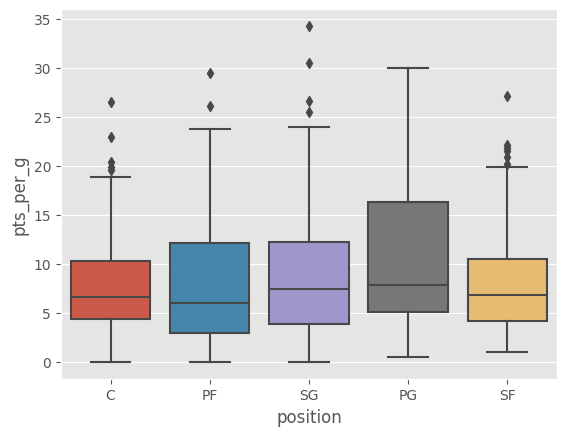

In [28]:
box_pts = sns.boxplot(y='pts_per_g',x='position', data=nba[nba.position.isin(positions)])

<Axes: xlabel='position', ylabel='ast_per_g'>

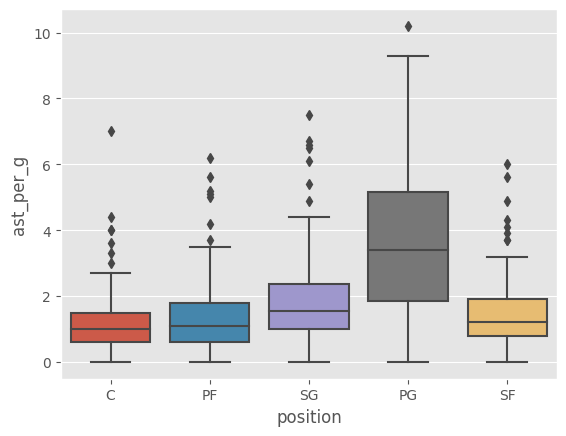

In [29]:
sns.boxplot(y='ast_per_g',x='position', data=nba[nba.position.isin(positions)])

<Axes: xlabel='position', ylabel='blk_per_g'>

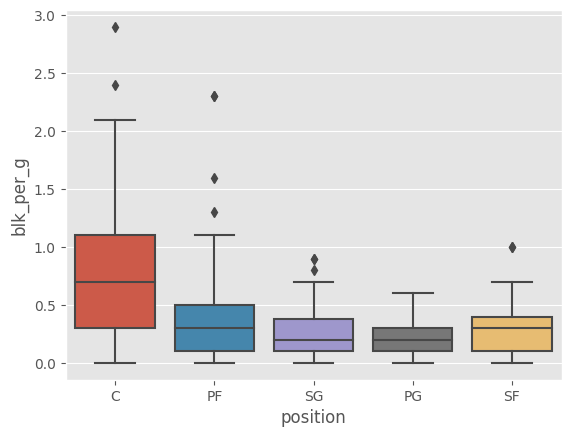

In [30]:
sns.boxplot(y='blk_per_g',x='position', data=nba[nba.position.isin(positions)])

# 2) Medidas de posición y dispersión

## 2.1)
Buscar a los jugadores que lideran la cantidad de puntos.

In [31]:
nba.head()

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,Steven Adams,C,26,OKC,63,26.70,9.30,2.30,0.80,1.10,10.90
1,Bam Adebayo,PF,22,MIA,72,33.60,10.20,5.10,1.10,1.30,15.90
2,LaMarcus Aldridge,C,34,SAS,53,33.10,7.40,2.40,0.70,1.60,18.90
3,Kyle Alexander,C,23,MIA,2,6.50,1.50,0.00,0.00,0.00,1.00
4,Nickeil Alexander-Walker,SG,21,NOP,47,12.60,1.80,1.90,0.40,0.20,5.70


In [32]:
jugadores_max = nba.groupby('team_id').agg({'pts_per_g': 'max'}).reset_index()
jugadores_max = pd.merge(left = jugadores_max,
                         right = nba[['team_id', 'player', 'pts_per_g']],
                         how = 'left',
                         on = ['team_id','pts_per_g'])
jugadores_max.head()

,team_id,pts_per_g,player
0,ATL,29.60,Trae Young
1,BOS,23.40,Jayson Tatum
2,BRK,27.40,Kyrie Irving
3,CHI,25.50,Zach LaVine
4,CHO,18.20,Devonte' Graham


In [33]:
nba.loc[nba.pts_per_g == max(nba.pts_per_g)]

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
197,James Harden,SG,30,HOU,68,36.50,6.60,7.50,1.80,0.90,34.30


In [34]:
nba['pts_per_g'].idxmax()

197

In [35]:
nba.iloc[197]

player       James Harden
position               SG
age                    30
team_id               HOU
g                      68
mp_per_g            36.50
trb_per_g            6.60
ast_per_g            7.50
stl_per_g            1.80
blk_per_g            0.90
pts_per_g           34.30
Name: 197, dtype: object

In [37]:
# Ordenando
nba.sort_values(by=['pts_per_g'], ascending=False).head(1)

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
197,James Harden,SG,30,HOU,68,36.50,6.60,7.50,1.80,0.90,34.30


## 2.2)

Vamos a buscar outliers usando el **criterio de Tuckey**:
- en cantidad de puntos y asistencias para los jugadores en general
- en cantidad de puntos marcados para cada puesto

In [38]:
# NIVEL GENERAL
q1, q2, q3 = np.quantile(nba['pts_per_g'], [0.25, 0.5, 0.75])
print(q1, q2, q3)

3.9 7.0 11.9


In [39]:
# valido que el segundo cuartil es igual a la mediana
q2 == np.median(nba['pts_per_g'])

True

In [42]:
rango_intercuartil = q3 - q1
print(rango_intercuartil)

umbral_outlier = q3 + rango_intercuartil*1.5
#umbral_outlier_2 = q1 - rango_intercuartil*1.5
print(umbral_outlier)

8.0
23.9


In [41]:
q1 - rango_intercuartil*1.5

-8.1

In [43]:
nba['pts_per_g'] > umbral_outlier

0      False
1      False
2      False
3      False
4      False
       ...  
524     True
525    False
526    False
527    False
528    False
Name: pts_per_g, Length: 529, dtype: bool

In [46]:
# vemos que jugadores están por encima de ese umbral
jugadores_outliers_puntos = nba.loc[nba['pts_per_g'] > umbral_outlier].shape[0]
print(f"La cantida de jugadores outliers por puntos es {jugadores_outliers_puntos}")

La cantida de jugadores outliers por puntos es 15


In [47]:
# PARA CADA PUESTO

def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

In [49]:
positions

['C', 'PF', 'PG', 'SF', 'SG']

In [48]:
q1(nba['pts_per_g'])

3.9

In [50]:
# Ahora a nivel grupo
points_o = nba[nba['position'].isin(positions)].groupby('position').agg({'pts_per_g': [q1, 'median', q3]})

points_o.columns = points_o.columns.map('_'.join)
points_o = points_o.reset_index()

points_o.head()

,position,pts_per_g_q1,pts_per_g_median,pts_per_g_q3
0,C,4.35,6.60,10.30
1,PF,3.00,6.00,12.10
2,PG,5.10,7.90,16.30
3,SF,4.20,6.80,10.50
4,SG,3.82,7.45,12.28


['lechuga', 'tomate']

In [53]:
points_o['pts_per_g_q3'] * 1.5

0   15.45
1   18.15
2   24.45
3   15.75
4   18.41
Name: pts_per_g_q3, dtype: float64

In [63]:
points_o['rango_intercuartil'] = points_o.pts_per_g_q3 - points_o.pts_per_g_q1
points_o['umbral_outlier'] = points_o.pts_per_g_q3 + points_o.rango_intercuartil*1.5

points_o

,position,pts_per_g_q1,pts_per_g_median,pts_per_g_q3,rango_intercuartil,umbral_outlier
0,C,4.35,6.60,10.30,5.95,19.23
1,PF,3.00,6.00,12.10,9.10,25.75
2,PG,5.10,7.90,16.30,11.20,33.10
3,SF,4.20,6.80,10.50,6.30,19.95
4,SG,3.82,7.45,12.28,8.45,24.95


In [59]:
nba.head()

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,Steven Adams,C,26,OKC,63,26.70,9.30,2.30,0.80,1.10,10.90
1,Bam Adebayo,PF,22,MIA,72,33.60,10.20,5.10,1.10,1.30,15.90
2,LaMarcus Aldridge,C,34,SAS,53,33.10,7.40,2.40,0.70,1.60,18.90
3,Kyle Alexander,C,23,MIA,2,6.50,1.50,0.00,0.00,0.00,1.00
4,Nickeil Alexander-Walker,SG,21,NOP,47,12.60,1.80,1.90,0.40,0.20,5.70


In [60]:
points_o.head()

,position,pts_per_g_q1,pts_per_g_median,pts_per_g_q3
0,C,4.35,6.60,10.30
1,PF,3.00,6.00,12.10
2,PG,5.10,7.90,16.30
3,SF,4.20,6.80,10.50
4,SG,3.82,7.45,12.28


0       C
1      PF
2       C
3       C
4      SG
       ..
524    PG
525     C
526     C
527     C
528     C
Name: position, Length: 529, dtype: object

In [ ]:
for i in range(len(points_o)):
  for j in range(len(nba)):
    if (nba.loc[j].position == points_o.loc[i].position) & (nba.loc[j].pts_per_g > points_o.loc[i].umbral_outlier):
      print(nba.loc[j].player, nba.loc[j].position, nba.loc[j].pts_per_g)


Joel Embiid C 23.0
Nikola Jokić C 19.9
Kristaps Porziņģis C 20.4
Karl-Anthony Towns C 26.5
Nikola Vučević C 19.6
Giannis Antetokounmpo PF 29.5
Anthony Davis PF 26.1
Bojan Bogdanović SF 20.2
DeMar DeRozan SF 22.1
Paul George SF 21.5
Kawhi Leonard SF 27.1
Khris Middleton SF 20.9
Andrew Wiggins SF 21.8
Bradley Beal SG 30.5
Devin Booker SG 26.6
James Harden SG 34.3
Zach LaVine SG 25.5


In [69]:
points_o[['position', 'umbral_outlier']].set_index('position')['umbral_outlier'].to_dict()

{'C': 19.225,
 'PF': 25.75,
 'PG': 33.099999999999994,
 'SF': 19.95,
 'SG': 24.950000000000003}

In [71]:
# Como lo hubiera hecho yo:
dict_positions = points_o[['position', 'umbral_outlier']].set_index('position')['umbral_outlier'].to_dict()
nba['umbral_outlier'] = nba['position'].map(dict_positions)
nba['umbral_outlier']

nba[nba['pts_per_g'] > nba['umbral_outlier']]

,player,position,age,team_id,g,mp_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g,umbral_outlier
12,Giannis Antetokounmpo,PF,25,MIL,63,30.40,13.60,5.60,1.00,1.00,29.50,25.75
34,Bradley Beal,SG,26,WAS,57,36.00,4.20,6.10,1.20,0.40,30.50,24.95
48,Bojan Bogdanović,SF,30,UTA,63,33.10,4.10,2.10,0.50,0.10,20.20,19.95
54,Devin Booker,SG,23,PHO,70,35.90,4.20,6.50,0.70,0.30,26.60,24.95
122,Anthony Davis,PF,26,LAL,62,34.40,9.30,3.20,1.50,2.30,26.10,25.75
127,DeMar DeRozan,SF,30,SAS,68,34.10,5.50,5.60,1.00,0.30,22.10,19.95
145,Joel Embiid,C,25,PHI,51,29.50,11.60,3.00,0.90,1.30,23.00,19.23
171,Paul George,SF,29,LAC,48,29.60,5.70,3.90,1.40,0.40,21.50,19.95
197,James Harden,SG,30,HOU,68,36.50,6.60,7.50,1.80,0.90,34.30,24.95
260,Nikola Jokić,C,24,DEN,73,32.00,9.70,7.00,1.20,0.60,19.90,19.23


## 2.3)

Buscar qué equipos tienen a los jujadores más y menos "parejos" en cantidad de puntos por partido. Usar medidas de dispersión)

In [72]:
# Ahora a nivel equipo
points_t = nba.groupby('team_id').agg({'pts_per_g': [q1, 'median', q3, 'std']})

points_t.columns = points_t.columns.map('_'.join)
points_t = points_t.reset_index()

points_t['rango_intercuartil'] = points_t.pts_per_g_q3 - points_t.pts_per_g_q1

points_t.head()

,team_id,pts_per_g_q1,pts_per_g_median,pts_per_g_q3,pts_per_g_std,rango_intercuartil
0,ATL,3.55,5.70,11.77,8.00,8.22
1,BOS,3.40,5.20,12.90,7.30,9.50
2,BRK,4.40,5.90,11.10,6.75,6.70
3,CHI,4.90,7.30,11.30,5.66,6.40
4,CHO,5.62,6.80,11.92,5.23,6.30


In [73]:
# busco a los 5 mas desparejos (rango intercuartil)
points_t.sort_values(by=['rango_intercuartil'], ascending=False).head(5)

,team_id,pts_per_g_q1,pts_per_g_median,pts_per_g_q3,pts_per_g_std,rango_intercuartil
27,TOR,2.40,7.00,15.40,6.90,13.00
15,MIA,3.00,8.20,13.50,6.29,10.50
12,LAC,3.25,6.80,13.75,8.05,10.50
24,POR,5.05,8.60,15.47,8.22,10.43
25,SAC,4.10,6.90,14.35,6.51,10.25


In [74]:
# busco a los 5 mas desparejos (desvio estandar)
points_t.sort_values(by=['pts_per_g_std'], ascending=False).head(5)

,team_id,pts_per_g_q1,pts_per_g_median,pts_per_g_q3,pts_per_g_std,rango_intercuartil
10,HOU,2.18,5.90,11.35,9.65,9.17
24,POR,5.05,8.60,15.47,8.22,10.43
12,LAC,3.25,6.80,13.75,8.05,10.50
0,ATL,3.55,5.70,11.77,8.00,8.22
1,BOS,3.40,5.20,12.90,7.30,9.50


In [ ]:
# busco a los 5 menos desparejos (rango intercuartil)
points_t.sort_values(by=['rango_intercuartil'], ascending=True).head(5)

,team_id,pts_per_g_q1,pts_per_g_median,pts_per_g_q3,pts_per_g_std,rango_intercuartil
17,MIN,7.30,8.80,9.12,6.91,1.83
13,LAL,5.40,6.85,8.78,7.23,3.38
19,NYK,5.80,6.50,9.85,4.28,4.05
9,GSW,5.83,8.15,10.57,4.87,4.75
6,DAL,5.25,7.95,10.22,7.11,4.97


In [ ]:
# busco a los 5 menos desparejos (desvio estandar)
points_t.sort_values(by=['pts_per_g_std'], ascending=True).head(5)

,team_id,pts_per_g_q1,pts_per_g_median,pts_per_g_q3,pts_per_g_std,rango_intercuartil
19,NYK,5.80,6.50,9.85,4.28,4.05
9,GSW,5.83,8.15,10.57,4.87,4.75
28,TOT,3.70,6.25,10.35,4.91,6.65
4,CHO,5.62,6.80,11.92,5.23,6.30
7,DEN,5.80,9.30,12.00,5.38,6.20


## 2.4)

Usar la asimetría para entender el comportamiento de la variable asistencias (*ast_per_g*).

BONUS: gráficar la distribución con la media, mediana y moda.

In [75]:
# Primero vamos a usar la funcion especifica
scipy.stats.skew(nba['ast_per_g'])

1.750053817920218

Vemos que el resultado es positivo, por lo tanto x tiene una cola a derecha.

In [76]:
# Ahora vamos a calcular la asimetría usando la formula completa
x = nba.ast_per_g
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.7550342103429448

Veamoslo gráficamente

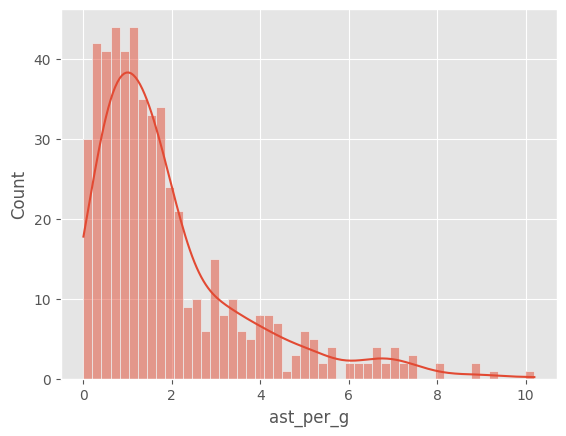

In [77]:
graf = sns.histplot(data=nba, x="ast_per_g", bins=50, kde=True)

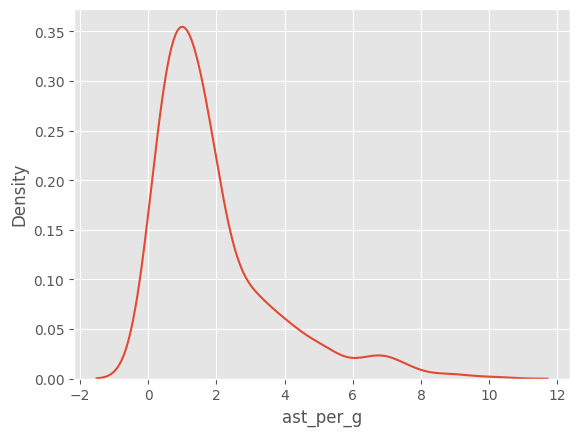

In [78]:
graf = sns.kdeplot(nba.ast_per_g, fill=False)

<ipython-input-82-72566857b7a8>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  graf = sns.kdeplot(nba.ast_per_g, shade=False)


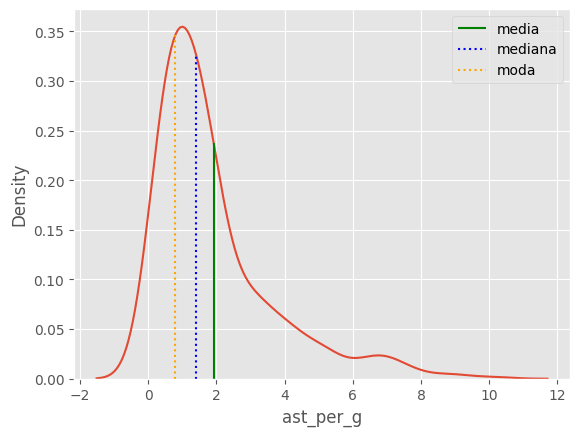

In [82]:
#graf = sns.histplot(data=nba, x="ast_per_g", bins = 50, kde=True)
graf = sns.kdeplot(nba.ast_per_g, shade=False)

kdeline = graf.lines[0]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()

mean = nba.ast_per_g.mean()
height = np.interp(mean, xs, ys)

mediana = nba.ast_per_g.median()
height2 = np.interp(mediana, xs, ys)

moda = nba.ast_per_g.mode()
height3 = np.interp(moda, xs, ys)

graf.vlines(mean, 0, height, color='green', label='media')
graf.vlines(mediana, 0, height2, color='blue', ls=':', label='mediana')
graf.vlines(moda, 0, height3, color='orange', ls=':', label='moda')

graf.legend()

plt.show()

# 3) Medidas de relación entre las variables

Queremos ver ahora como se relacionan las variables entre sí en el dataset original.

## 3.1)

Hallar la matriz de correlación de las variables y representarla gráficamente.

TIP: usar solo variables numéricas y quitar edad y cantidad de partidos.

In [91]:
nba.columns[0]

'player'

In [88]:
nba[nba.columns[6:-1]]

,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,9.30,2.30,0.80,1.10,10.90
1,10.20,5.10,1.10,1.30,15.90
2,7.40,2.40,0.70,1.60,18.90
3,1.50,0.00,0.00,0.00,1.00
4,1.80,1.90,0.40,0.20,5.70
...,...,...,...,...,...
524,4.30,9.30,1.10,0.10,29.60
525,7.10,1.50,0.70,0.40,11.10
526,2.00,0.00,0.00,0.00,1.00
527,3.00,0.30,0.30,0.20,4.40


In [87]:
 nba[['trb_per_g',
      'ast_per_g',
      'stl_per_g',
      'blk_per_g',
      'pts_per_g']]

,trb_per_g,ast_per_g,stl_per_g,blk_per_g,pts_per_g
0,9.30,2.30,0.80,1.10,10.90
1,10.20,5.10,1.10,1.30,15.90
2,7.40,2.40,0.70,1.60,18.90
3,1.50,0.00,0.00,0.00,1.00
4,1.80,1.90,0.40,0.20,5.70
...,...,...,...,...,...
524,4.30,9.30,1.10,0.10,29.60
525,7.10,1.50,0.70,0.40,11.10
526,2.00,0.00,0.00,0.00,1.00
527,3.00,0.30,0.30,0.20,4.40


In [92]:
nba_for_cor = nba[['trb_per_g',
                   'ast_per_g',
                   'stl_per_g',
                   'blk_per_g',
                   'pts_per_g']]

corr_matrix = nba_for_cor.corr()
print(corr_matrix)

           trb_per_g  ast_per_g  stl_per_g  blk_per_g  pts_per_g
trb_per_g       1.00       0.37       0.45       0.69       0.63
ast_per_g       0.37       1.00       0.63       0.08       0.73
stl_per_g       0.45       0.63       1.00       0.27       0.62
blk_per_g       0.69       0.08       0.27       1.00       0.35
pts_per_g       0.63       0.73       0.62       0.35       1.00


Veamos ahora la matriz de correlación

<Axes: >

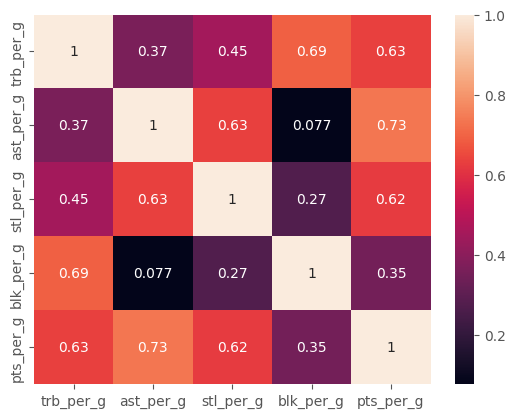

In [94]:
sns.heatmap(corr_matrix, annot=True)

## 3.2)

Usar un **SCATTERPLOT** para analizar el comportamiento de las variables que se encuentran más relacionadas (ast_per_g y pts_per_g).

BONUS: diferenciar por el puesto del jugador.

<Axes: xlabel='ast_per_g', ylabel='pts_per_g'>

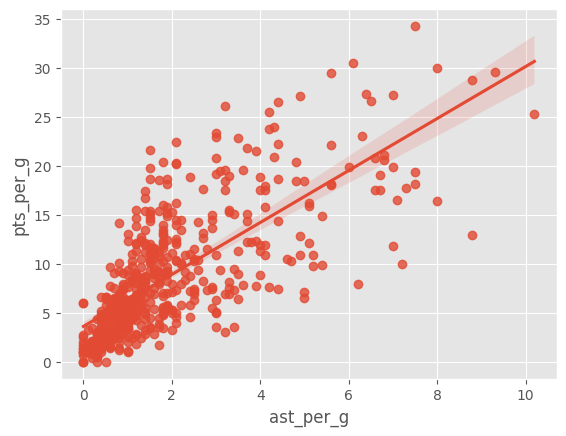

In [99]:
sns.regplot(data=nba, x="ast_per_g", y="pts_per_g", fit_reg=True)

In [106]:
nba['position'].value_counts()

SG       118
C        107
PF       105
PG        91
SF        89
PF-C       5
PF-SF      3
SF-PF      3
SF-SG      2
SG-PG      2
SF-C       1
SG-SF      1
C-PF       1
PG-SG      1
Name: position, dtype: int64

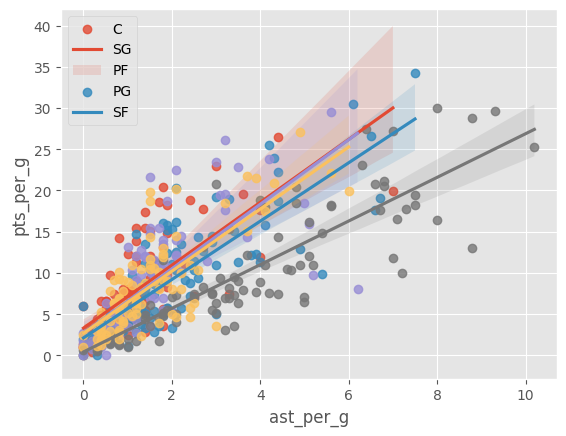

In [109]:
# Diferenciamos por posición del jugador
sns.regplot(data=nba[nba['position'] == 'C'], x="ast_per_g", y="pts_per_g",fit_reg=True)
sns.regplot(data=nba[nba['position'] == 'SG'], x="ast_per_g", y="pts_per_g",fit_reg=True)
sns.regplot(data=nba[nba['position'] == 'PF'], x="ast_per_g", y="pts_per_g",fit_reg=True)
sns.regplot(data=nba[nba['position'] == 'PG'], x="ast_per_g", y="pts_per_g",fit_reg=True)
sns.regplot(data=nba[nba['position'] == 'SF'], x="ast_per_g", y="pts_per_g",fit_reg=True)

plt.legend(['C', 'SG', 'PF', 'PG', 'SF'])

<Axes: xlabel='ast_per_g', ylabel='pts_per_g'>

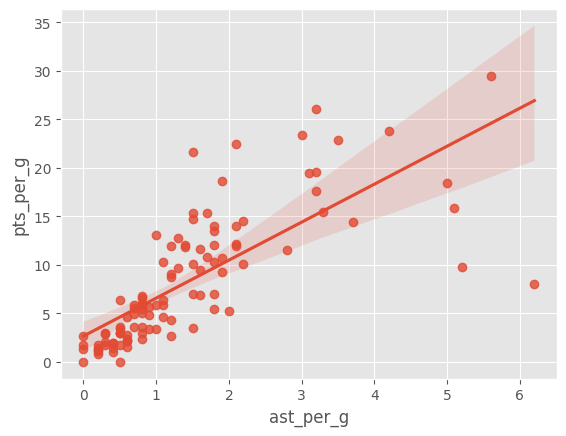

In [111]:
sns.regplot(data=nba[nba.position == 'PF'], x="ast_per_g", y="pts_per_g")